In [31]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


In [4]:
class TimeSeriesData():
    def __init__(self,num_points,xmin,xmax):
        self.xmin=xmin
        self.xmax=xmax
        self.num_points=num_points
        self.resolution=(xmax-xmin)/num_points
        self.x_data=np.linspace(xmin,xmax,num_points)
        self.y_true=np.sin(self.x_data)
        
    def ret_true(self,x_series):
        return np.sin(x_series)
    
    def next_batch(self,batch_size,steps,return_batch_ts=False):
        #Random starting point for batch
        random_start=np.random.rand(batch_size,1)
        
        #Put the random point on the time series
        ts_start=random_start*(self.xmax-self.xmin-(steps*self.resolution)) #Trick to convert any number into a point in the time series
        
        
        batch_ts=ts_start+np.arange(0.0,steps+1) * self.resolution #steps +1 because we are predicting just one tme step ahead
        
        y_batch=np.sin(batch_ts)
        
        #Formatting for RNN
        if return_batch_ts:
            return y_batch[:,:-1].reshape(-1,steps,1) , y_batch[:,1:].reshape(-1,steps,1), batch_ts
        else:
            return y_batch[:,:-1].reshape(-1,steps,1) , y_batch[:,1:].reshape(-1,steps,1) #Returning the sequence shifted over one time step
        

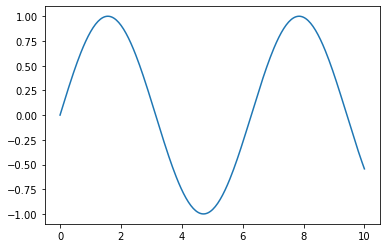

In [5]:
ts_data=TimeSeriesData(250,0,10)
plt.plot(ts_data.x_data,ts_data.y_true)
plt.show()

(31,)


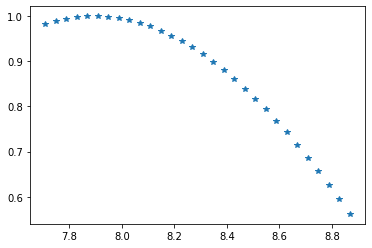

In [26]:
num_time_steps=30

y1,y2,ts= ts_data.next_batch(1,num_time_steps,True)

print(ts.flatten().shape)

plt.plot(ts.flatten()[1:],y1.flatten(),"*")
plt.show()

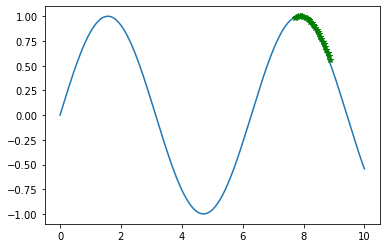

In [29]:
plt.plot(ts_data.x_data,ts_data.y_true)
plt.plot(ts.flatten()[1:],y1.flatten(),"g*")
plt.show()

In [32]:
num_inputs=1
num_neurons=100
num_outputs=1
learning_rate=0.001
num_iter=5000
batch_size=1

x=tf.placeholder(tf.float32,[None,num_time_steps,num_inputs])
y=tf.placeholder(tf.float32,[None,num_time_steps,num_outputs])

In [33]:

#ANY RNN CELL TYPE
cell=tf.contrib.rnn.OutputProjectionWrapper(tf.contrib.rnn.GRUCell(num_units=num_neurons,activation=tf.nn.relu),output_size=num_outputs)

outputs,states=tf.nn.dynamic_rnn(cell,x,dtype=tf.float32)

AttributeError: module 'tensorflow_core.compat.v1' has no attribute 'contrib'